# The Great Repayment Mystery: Can You Unravel the Clues?  

### Description  
You are a data analyst at a fintech company that provides loan services to customers. Your manager has asked you to analyze the loan repayment behavior of borrowers to identify trends and insights that can inform business decisions. You have been provided with a large dataset containing loan repayment information, including loan amounts, repayment dates, and borrower information. Your task is to use Pandas to analyze this data, identify trends, and provide insights that can help the company improve its loan services.  

### Tasks  
- **Loan Repayment Analysis:** Calculate the average loan repayment amount by month and identify the top 5 months with the highest repayment amounts.  
- **Borrower Insights:** Group borrowers by age and calculate the average loan amount and repayment amount for each age group.  
- **Late Repayments:** Identify loans that were repaid late (after the due date) and calculate the total amount of late repayments.  

In [1]:
# import libraries
import pandas as pd
import numpy as np
import sys

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Pandas version 2.2.1
Numpy version 1.26.4


# The Data  

The dataset contains information about loan repayments made by borrowers to a fintech company. The dataset includes 1200 loans, each with information about the loan amount, repayment date, borrower age, due date, and repayment amount.    

### Column Definitions
- **Loan Amount:** The amount borrowed by the customer (float)  
- **Repayment Date:** The date on which the loan was repaid (datetime)  
- **Borrower Age:** The age of the borrower at the time of loan repayment (int)  
- **Due Date:** The date by which the loan was due to be repaid (datetime)  
- **Repayment Amount:** The amount repaid by the borrower (float)  

**Some additional notes on the dataset:**  
- The dataset includes some missing values in the Repayment Amount column, representing loans where the repayment amount is not known.  
- Some loans have been marked as late repayments, where the Repayment Date is after the Due Date.  

In [2]:
# set the seed
np.random.seed(0)

# generate the loan data
loans = pd.DataFrame({
    'Loan Amount': np.random.uniform(1000, 10000, size=1000),
    'Repayment Date': pd.date_range('2022-01-01', periods=1000),
    'Borrower Age': np.random.randint(25, 60, size=1000),
    'Due Date': pd.date_range('2022-01-01', periods=1000),
    'Repayment Amount': np.random.uniform(1000, 10000, size=1000)
})

# generate repayment amounts (never larger than loan amount)
loans['Repayment Amount'] = loans.apply(lambda x: np.random.choice([np.random.uniform(0, x['Loan Amount']), x['Loan Amount']]), axis=1)

# add some late repayments
late_repayments = loans.sample(frac=0.2)
late_repayments['Repayment Date'] += pd.Timedelta(days=30)
loans = pd.concat([loans, late_repayments])

# add some missing values
loans.loc[np.random.choice(loans.index, size=100), 'Repayment Amount'] = np.nan

loans.head()

,Loan Amount,Repayment Date,Borrower Age,Due Date,Repayment Amount
0,5939.321535,2022-01-01,42,2022-01-01,2940.536278
1,7436.704297,2022-01-02,54,2022-01-02,7436.704297
2,6424.870385,2022-01-03,31,2022-01-03,6424.870385
3,5903.948647,2022-01-04,53,2022-01-04,2272.657962
4,4812.893194,2022-01-05,35,2022-01-05,3978.737138


Let us start with taking a peek at the datatypes.

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 0 to 941
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Loan Amount       1200 non-null   float64       
 1   Repayment Date    1200 non-null   datetime64[ns]
 2   Borrower Age      1200 non-null   int32         
 3   Due Date          1200 non-null   datetime64[ns]
 4   Repayment Amount  1074 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int32(1)
memory usage: 83.9 KB


# Missing Values  

If I received this dataset, I would have asked if I could take a look at the source of the data. There are lots of times where the person/script that compiled the data for you is not 100% perfect. Data is usually messy and it may have edge cases that may not have been taken into account when preparing the data.  

In this case, since we have no other reference point, we will simply delete rows with the missing values.

In [4]:
loans = loans.dropna()
loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1074 entries, 0 to 941
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Loan Amount       1074 non-null   float64       
 1   Repayment Date    1074 non-null   datetime64[ns]
 2   Borrower Age      1074 non-null   int32         
 3   Due Date          1074 non-null   datetime64[ns]
 4   Repayment Amount  1074 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int32(1)
memory usage: 46.1 KB


# Loan Repayment Analysis:  

Calculate the average loan repayment amount by month and identify the top 5 months with the highest repayment amounts.  

**Challenge:** Can you redo this section, but group by month and year which may have been the original intention of the task?

In [5]:
# create group object
group = loans.groupby(loans['Repayment Date'].dt.month)

# top 5 repayment amounts
group.mean(numeric_only=True).sort_values(by='Repayment Amount', ascending=False)['Repayment Amount'].head(5)

Repayment Date
1     4584.052671
12    4165.392593
9     4153.814819
4     4096.045033
3     4082.376501
Name: Repayment Amount, dtype: float64

Notice I was able to pull the month out of the date column.

In [6]:
loans['Repayment Date'].dt.month

0       1
1       1
2       1
3       1
4       1
       ..
301    11
515     6
565     8
995    10
941     8
Name: Repayment Date, Length: 1074, dtype: int32

# Borrower Insights:  

Group borrowers by age and calculate the average loan amount and repayment amount for each age group.  

From the figure below, it seems like not a lot of people are paying their loans off!

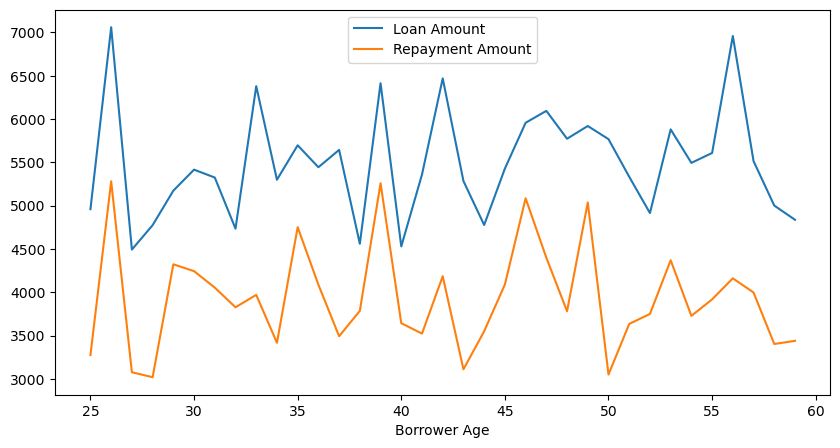

In [7]:
# create group object
group = loans.groupby('Borrower Age')

# top 5 repayment amounts
group.mean(numeric_only=True).plot(figsize=(10,5));

# Late Repayments:  

Identify loans that were repaid late (after the due date) and calculate the total amount of late repayments.

In [8]:
# flag the loans that were repaid late
loans['late'] = loans['Repayment Date'] > loans['Due Date']
loans[loans['late'] == True].head()

,Loan Amount,Repayment Date,Borrower Age,Due Date,Repayment Amount,late
387,2434.730171,2023-02-22,47,2023-01-23,2434.730171,True
510,1941.650999,2023-06-25,54,2023-05-26,894.474464,True
46,2893.443050,2022-03-18,28,2022-02-16,2893.443050,True
20,9807.565080,2022-02-20,50,2022-01-21,2333.814874,True
720,7759.194840,2024-01-21,55,2023-12-22,7759.194840,True


### How many were repaid late?

In [9]:
loans[loans['late'] == True].count()

Loan Amount         171
Repayment Date      171
Borrower Age        171
Due Date            171
Repayment Amount    171
late                171
dtype: int64

### Calculate the total amount of late repayments  

We get a total of $650,231.87.

In [10]:
loans[loans['late'] == True].sum(numeric_only=True)['Repayment Amount']

650231.8707490516

# Key Takeaways  
- How to handle missing values (dropna() function)
- How to group data by a specific column (groupby() function)
- How to calculate average values by group (mean() function)
- How to sort values in descending order (sort_values() function)
- How to extract specific columns or rows from a dataset

### Tasks and Outputs
**Loan Repayment Analysis:**  
- Calculated average loan repayment amount by month
- Identified top 5 months with highest repayment amounts: January, December, September, April, and March

**Borrower Insights:**  
- Grouped borrowers by age and calculated average loan and repayment amounts
- Plotted a graph to visualize the data

**Late Repayments:**  
- Identified loans repaid late (after due date)
- Calculated total amount of late repayments: $650,231.87

<p class="text-muted">This tutorial was created by <a href="https://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>